### Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

### Оцените ошибку модели из п.1 .

### Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [3]:
def split_data_b( data, split_date):
    return data.loc[data.index <= split_date].copy(), data.loc[data.index >  split_date].copy()

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [6]:
d_data = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1]

Text(0.5, 0, 't')

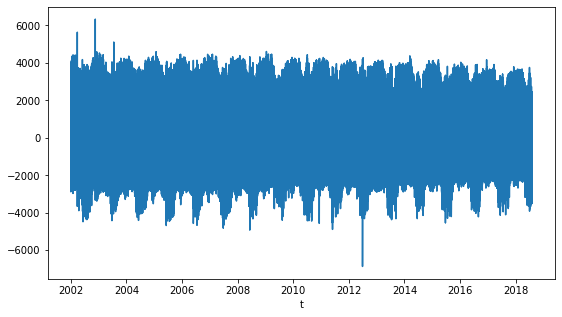

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(data.iloc[:-1].index,d_data)
plt.xlabel('t')

In [8]:
data['exp_smoothed'] = exponential_smoothing(data['PJME_MW'], 0.05)

In [9]:
data = data.loc[(data.index >= '2015-01-01') & (data.index < '2016-01-01')]

In [10]:
train, test = split_data_b(data, '2015-10-10')

In [11]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

In [12]:
h = 1

X_train = train.iloc[:-h,:]
y_train = train.exp_smoothed.values[h:]
X_test = test.iloc[:-h,:]
y_test = test.exp_smoothed.values[h:]

In [13]:
X_train = X_train.drop(['Time'], axis=1)
X_test = X_test.drop(['Time'], axis=1)

In [14]:
model_gb.fit( X_train, y_train)

GradientBoostingRegressor(max_depth=15, random_state=0)

In [15]:
X_test_pred_gb = model_gb.predict(X_test)

In [16]:
mean_absolute_percentage_error(y_test, X_test_pred_gb)

0.25666273600470135

In [17]:
h = 10

X_train = train.iloc[:-h,:]
y_train = train.exp_smoothed.values[h:]
X_test = test.iloc[:-h,:]
y_test = test.exp_smoothed.values[h:]

In [18]:
X_train = X_train.drop(['Time'], axis=1)
X_test = X_test.drop(['Time'], axis=1)

In [19]:
model_gb.fit( X_train, y_train)

GradientBoostingRegressor(max_depth=15, random_state=0)

In [20]:
X_test_pred_gb = model_gb.predict(X_test)

In [21]:
mean_absolute_percentage_error(y_test, X_test_pred_gb)

2.4628395079547167

#### Ошибка при h=10 в 10 раз выше, но все равно не очень высока.

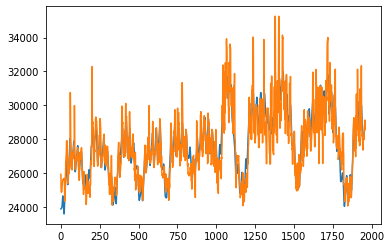

In [22]:
plt.plot(y_test)
plt.plot(X_test_pred_gb)

#### Разбросы предсказаний при h=10 очень сильные

### Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

### а) Изменение температуры за окном :).

### б) Количество денег, которые тратят покупатели в интернет магазине.

### в) Вес растущего котенка.

### г) Прирост объема деревьев в лесу от времени

а) если поминутные данные за несколько лет - нестационарный с сезоном, циклом и с трендом (глобальное потепление)

б) может быть стационарным (почасовые данные в рабочий день с 12 до 18), а может нестационарным (дневные данные магазина кондицинеров)

в) нестационарный с трендом (если ежедневные данные) и стационарный (если поминутные за день)

г) стационарный с трендом, сезоном и циклом (если деревья больше и растут весной и летом)